# Examples related to LLS fitting [v1.1]

In [1]:
%matplotlib notebook

In [2]:
# imports
from pyigm.abssys import lls_fitting as pyi_llf

## Maximum Likelihood analysis of a Lyman limit

### LLS dict

In [3]:
lls_dict = dict(z=0.41117, spec_fil='FBQS.J1252+2913_hsla.fits', 
               NHI_mnx=[17., 19.],
               neval=50, # 100 requires 20Gb of RAM
               windows=[[1265., 1283.]],  # Wavelengths for LL analysis
               )

#### Continuum parameters

In [4]:
lls_dict['analy_type'] = 'Fit_Conti'
# Continuum
lls_dict['cdict'] = dict(type='Fit_line', 
                         C1_range=[0., 1e-17],  # Allowed range to fit for slope
                         C0_range=[3.e-16, 5e-15],   # Range range to fit for normalization
                         analy=[[1303.3, 1303.96], # Windows for fitting continuum
                       [1300.4, 1301.18],
                       [1298.0, 1299.2], 
                       [1296.2, 1296.9]])

### Run

In [5]:
reload(pyi_llf)
NHI_eval, C0_val, C1_val, lnL3D = pyi_llf.maxlik_fitlinearc(lls_dict, neval=50)

/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:108: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


### Analyze the Likelihood grid

In [7]:
reload(pyi_llf)
pyi_llf.analyze_lnl(lls_dict, (NHI_eval, C0_val, C1_val), lnL3D)

#### NHI results

In [8]:
lls_dict['fit_NHI']

[18.020408163265305, 18.020408163265305, 18.755102040816325]

#### Continuum results

In [9]:
lls_dict['cdict']['fit_val']

[[1.3551020408163264e-15, 1.2591836734693876e-15, 1.3551020408163264e-15],
 [2.0408163265306125e-19, 6.122448979591838e-19, 4.693877551020409e-18]]

### Plots

#### Contour

<IPython.core.display.Javascript object>


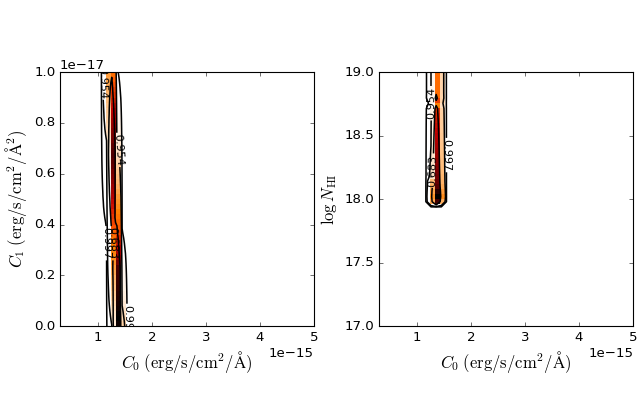

In [11]:
reload(pyi_llf)
pyi_llf.plot_contours(lnL3D, (NHI_eval, C0_val, C1_val))

#### Data

<IPython.core.display.Javascript object>


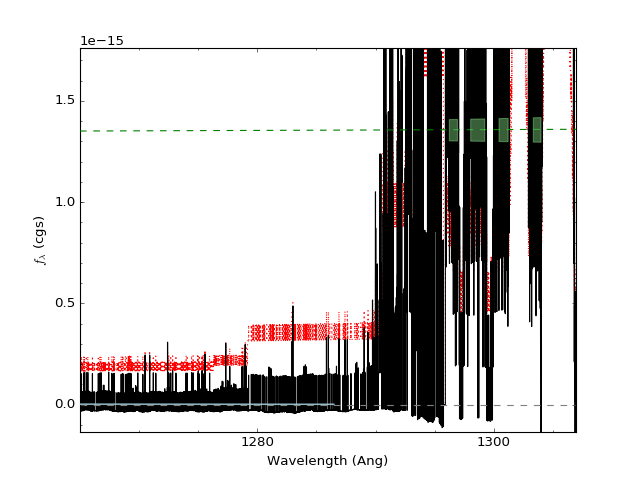

In [12]:
reload(pyi_llf)
plt.clf()
ax = plt.gca()
pyi_llf.plot_NHI_model(lls_dict, ax)
plt.show()

## Write

In [20]:
reload(pyi_llf)
pyi_llf.save_soln((NHI_eval, C0_val, C1_val, lnL3D), lls_dict, 'save_soln')

Wrote lls_dict to save_soln.json
Wrote rest to save_soln.fits


In [21]:
hdu = fits.open('save_soln.fits')

In [22]:
hdu.info()

Filename: save_soln.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU       4   ()      
  1  NHI_EVAL    ImageHDU         7   (50,)   float64   
  2  C0_VAL      ImageHDU         7   (50,)   float64   
  3  C1_VAL      ImageHDU         7   (50,)   float64   
  4  LNL3D       ImageHDU         9   (50, 50, 50)   float64   


## Read

In [24]:
reload(pyi_llf)
xlist, lls_dict = pyi_llf.read_soln('save_soln')

In [25]:
NHI_eval, C0_val, C1_val, lnL3D = xlist

In [26]:
NHI_eval

array([ 17.        ,  17.04081633,  17.08163265,  17.12244898,
        17.16326531,  17.20408163,  17.24489796,  17.28571429,
        17.32653061,  17.36734694,  17.40816327,  17.44897959,
        17.48979592,  17.53061224,  17.57142857,  17.6122449 ,
        17.65306122,  17.69387755,  17.73469388,  17.7755102 ,
        17.81632653,  17.85714286,  17.89795918,  17.93877551,
        17.97959184,  18.02040816,  18.06122449,  18.10204082,
        18.14285714,  18.18367347,  18.2244898 ,  18.26530612,
        18.30612245,  18.34693878,  18.3877551 ,  18.42857143,
        18.46938776,  18.51020408,  18.55102041,  18.59183673,
        18.63265306,  18.67346939,  18.71428571,  18.75510204,
        18.79591837,  18.83673469,  18.87755102,  18.91836735,
        18.95918367,  19.        ])